In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv('S02-hw-dataset.csv')
df

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [112]:
df.head(7)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0


In [113]:
df.tail(7)

,user_id,age,country,purchases,revenue
34,35,45.0,FR,2,404
35,36,51.0,US,3,342
36,37,18.0,DE,4,1104
37,38,35.0,DE,3,738
38,39,39.0,FR,7,1162
39,40,34.0,RU,7,2086
40,10,24.0,RU,7,511


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [115]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [116]:
df['user_id'].isna().mean()

np.float64(0.0)

In [117]:
df['age'].isna().mean()

np.float64(0.04878048780487805)

In [118]:
df['purchases'].isna().mean()

np.float64(0.0)

In [119]:
df['revenue'].isna().mean()

np.float64(0.0)

In [120]:
# мы видим, что пропуски есть только в столбце "age"

In [121]:
df = df.dropna() # удаляем строки с пропусками

In [122]:
df[df.duplicated()]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [123]:
# 40-я строка является полным дубликатом одной из предыдущих

In [124]:
df = df.drop_duplicates() # удаляем все дубликаты

In [125]:
df[df['age'] < 18]
# выведем строки, в которых значения возраста меньше 18, если такие имеются, это противоречит логике для нашего датасэта

,user_id,age,country,purchases,revenue
20,21,5.0,RU,8,1488


In [126]:
df = df[df['age'] >= 18] # удаляем строки, в которых возраст меньше 18


In [127]:
df[df['purchases'] < 0]
# выведем строки, в которых кол-во покупок меньше нуля, кол-во не может быть отрицательным значением

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [128]:
df = df[df['purchases'] >= 0]
# удаляем строки, в которых кол-во покупок меньше нуля, кол-во не может быть отрицательным значением

In [129]:
df[df['age'] > 100]
# строки, в которых возраст больше нуля

,user_id,age,country,purchases,revenue


In [130]:
df = df[df['age'] <= 100] # удалим строки, в которых возраст больше нуля

In [131]:
df[(df['purchases'] > 0) & (df['revenue'] == 0)]
# строки, в которых кол-во покупок больше нуля, но доход нулевой

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [132]:
df = df.drop(10)

In [133]:
df[df['revenue'] < 0]
# строки, с доходом, меньшим нуля

,user_id,age,country,purchases,revenue


In [134]:
""" Подытожим базовый контроль качества, пропуски присутствуют только в столбце 'age', а именно в 4 и 12 строках.
Строка 40 является дубликатом. В строке 5 возраст больше 100, что противоречит логике датасэта, а также кол-во
покупок = -1, чего быть не может. В строке 20 возраст меньше 18. И в строке 10 покупок больше нуля, но доход равен нулю,
что противоречит логике датасэта. """

" Подытожим базовый контроль качества, пропуски присутствуют только в столбце 'age', а именно в 4 и 12 строках.\nСтрока 40 является дубликатом. В строке 5 возраст больше 100, что противоречит логике датасэта, а также кол-во\nпокупок = -1, чего быть не может. В строке 20 возраст меньше 18. И в строке 10 покупок больше нуля, но доход равен нулю,\nчто противоречит логике датасэта. "

In [135]:
df

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511
11,12,20.0,CN,7,1652
13,14,36.0,DE,9,2358


In [136]:
df['country'].value_counts()

,count
country,
FR,11
RU,11
US,6
DE,5
CN,2


In [137]:
df['purchases'].value_counts()

,count
purchases,
7,7
6,7
3,5
5,4
2,3
0,3
4,3
9,1
11,1


In [138]:
group = df.groupby('country')
group.size()

,0
country,
CN,2
DE,5
FR,11
RU,11
US,6


In [139]:
group['purchases'].mean()

,purchases
country,
CN,4.500000
DE,6.600000
FR,4.727273
RU,4.272727
US,4.000000


In [140]:
group['purchases'].sum()

,purchases
country,
CN,9
DE,33
FR,52
RU,47
US,24


In [141]:
group['revenue'].mean()

,revenue
country,
CN,1054.000000
DE,1475.400000
FR,666.000000
RU,752.000000
US,638.166667


In [142]:
group['revenue'].sum()

,revenue
country,
CN,2108
DE,7377
FR,7326
RU,8272
US,3829


In [143]:
''' После анализа можно сделать вывод, что по странам доминируют FR и RU. В категориальных признаках этих групп: по среднему
значению продаж и по срденей выручке доминирует DE; по сумме продаж доминирует FR. По суммарной выручке доминирует RU.
'''

' После анализа можно сделать вывод, что по странам доминируют FR и RU. В категориальных признаках этих групп: по среднему\nзначению продаж и по срденей выручке доминирует DE; по сумме продаж доминирует FR. По суммарной выручке доминирует RU.\n'

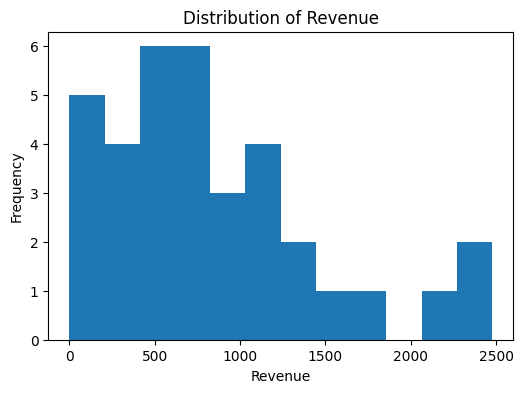

In [144]:
plt.figure(figsize=(6,4))
plt.hist(df['revenue'].dropna(), bins=12)
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.title("Distribution of Revenue")
plt.show()


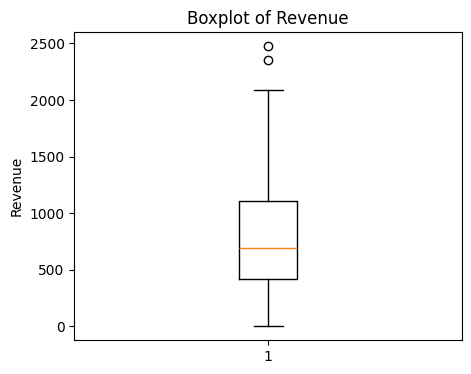

In [145]:
plt.figure(figsize=(5,4))
plt.boxplot(df['revenue'].dropna(), vert=True)
plt.ylabel("Revenue")
plt.title("Boxplot of Revenue")
plt.show()

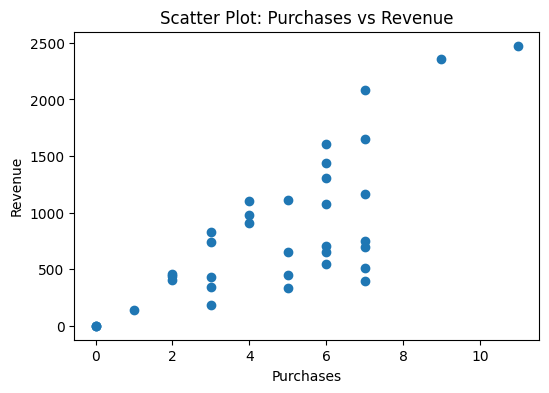

In [146]:
plt.figure(figsize=(6,4))
plt.scatter(df['purchases'], df['revenue'])
plt.xlabel("Purchases")
plt.ylabel("Revenue")
plt.title("Scatter Plot: Purchases vs Revenue")
plt.show()